# Self Organizing Map

### Building self organizing map for credit card application dataset to detect frauds

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

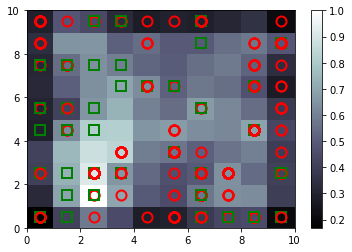

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [8]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,1)], mappings[(2,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [10]:
fraud_customer_ids = frauds[:, :1]

In [11]:
fraud_customer_ids

array([[15766183.],
       [15808662.],
       [15684722.],
       [15772329.],
       [15734649.],
       [15646082.],
       [15717629.],
       [15757188.],
       [15604536.],
       [15635598.],
       [15647191.],
       [15623369.],
       [15793896.],
       [15650591.],
       [15633608.],
       [15675450.],
       [15739548.],
       [15699839.],
       [15648069.],
       [15731586.],
       [15644453.],
       [15783883.],
       [15756538.],
       [15801473.],
       [15694666.],
       [15728523.],
       [15716082.],
       [15646594.],
       [15699238.],
       [15593959.],
       [15629750.],
       [15794204.],
       [15734008.],
       [15592999.],
       [15757434.],
       [15742009.],
       [15752344.],
       [15737909.],
       [15611409.],
       [15711299.],
       [15721504.],
       [15608916.]])